<a href="https://colab.research.google.com/github/RaphaelEiras/colorizando-fotos/blob/master/EDA_III_Pr%C3%A1tica_Juntos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA Prática Juntos


Abaixo Documentações Libs Gráficos:

- [Matplotlib](https://matplotlib.org/stable/tutorials/index.html#introductory)
- [Seaborn](https://seaborn.pydata.org/tutorial.html)

Opções de EDA:

[Predict Sales](https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data?select=sales_train.csv)

[PUGB Finish Predict](https://www.kaggle.com/c/pubg-finish-placement-prediction/data)

[Predict Price](https://www.kaggle.com/c/mercari-price-suggestion-challenge/data?select=train.tsv.7z)

[Netflix Dataset](https://www.kaggle.com/shivamb/netflix-shows)


[Predict Imdb Rate](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+ratings.csv)

## Desafio Escolhido

[Video Game Sales](https://www.kaggle.com/gregorut/videogamesales)



## Posiveis Perguntas

******

- Qual o jogo mais vendido por região/Genero/Plataforma ? OK
- Jogo infantil vende mais do que adultos ? - Procurar base para join com classificação 
- Jogos exclusivos vendem mais ? OK
- Concorrencia entre exclusivos ?
- Jogo exclusivo vende mais que multi-plataforma ?
- Produtora que mais vende e mais jogos ?
- Venda por jogo ?
- Será que a os EU indicam o comportamento do resto do mundo ?
- Há anos com mais vendas de jogos ?
- Genero por Região ?
- Produtora vende mais onde é produzido ou fora ?
- Pior Jogo em Vendas ?


In [ ]:
!pip install -U seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
## ref - https://pythonguides.com/what-is-matplotlib-inline/
%matplotlib inline

In [ ]:
#statistics lib
from scipy import stats

In [ ]:
df = pd.read_csv('vgsales.csv')

In [ ]:
## Inspect 

In [ ]:
df.shape

(16598, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.isna().sum()/df.shape[0]

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            0.016327
Genre           0.000000
Publisher       0.003494
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [ ]:
df.columns.str.lower()

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

In [ ]:
columns_renamed = {
    'Rank': 'rank', 
    'Name': 'name', 
    'Platform': 'platform', 
    'Year': 'year', 
    'Genre': 'genre',
    'Publisher': 'publisher', 
    'NA_Sales': 'na_sales',
    'EU_Sales': 'eu_sales', 
    'JP_Sales': 'jp_sales', 
    'Other_Sales': 'other_sales', 
    'Global_Sales': 'global_sales'
}
df.rename(columns=columns_renamed, inplace=True)

In [ ]:
df[df.year.isna()]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [ ]:
df[df.publisher.isna()]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.year =df.year.astype(int)

In [ ]:
df.shape

(16291, 11)

In [ ]:
df[df.duplicated()].count()

rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16291 non-null  int64  
 1   name          16291 non-null  object 
 2   platform      16291 non-null  object 
 3   year          16291 non-null  int64  
 4   genre         16291 non-null  object 
 5   publisher     16291 non-null  object 
 6   na_sales      16291 non-null  float64
 7   eu_sales      16291 non-null  float64
 8   jp_sales      16291 non-null  float64
 9   other_sales   16291 non-null  float64
 10  global_sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [ ]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
## EDA

In [ ]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df_top_games = df[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]

In [ ]:
for col in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
  print(col)
  print(df_top_games[df_top_games[col]==df_top_games[col].max()])

na_sales
         name  na_sales  eu_sales  jp_sales  other_sales
0  Wii Sports     41.49     29.02      3.77         8.46
eu_sales
         name  na_sales  eu_sales  jp_sales  other_sales
0  Wii Sports     41.49     29.02      3.77         8.46
jp_sales
                       name  na_sales  eu_sales  jp_sales  other_sales
4  Pokemon Red/Pokemon Blue     11.27      8.89     10.22          1.0
other_sales
                             name  na_sales  eu_sales  jp_sales  other_sales
17  Grand Theft Auto: San Andreas      9.43       0.4      0.41        10.57


O Jogo mais vendido nas regiões foram Wii Sports, Pokemon, GTA

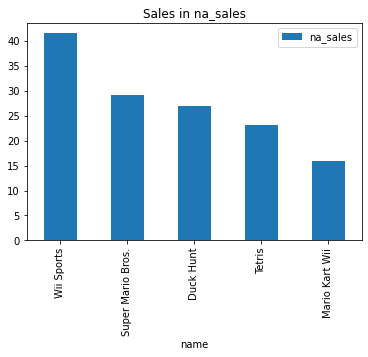

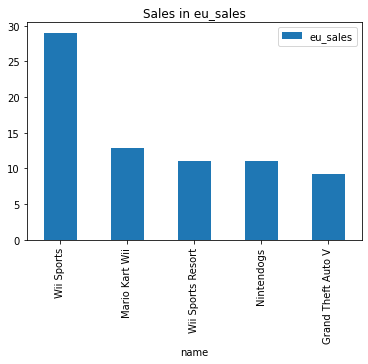

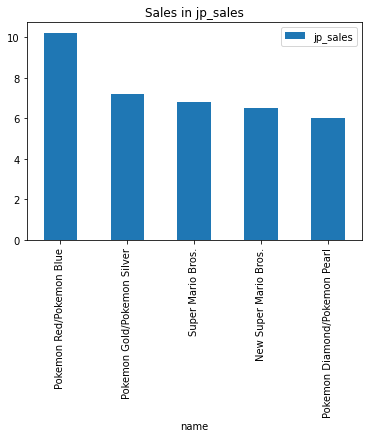

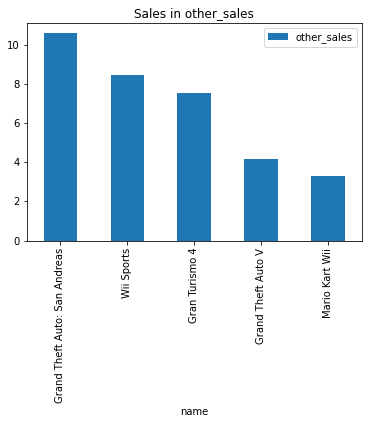

In [ ]:
for col in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
  df_plot = df_top_games.sort_values(by=col, ascending=False).head(5)
  df_plot[['name',col]].set_index('name').plot.bar(rot=90)
  plt.title(f'Sales in {col}')

In [ ]:
## Mais vendido por categoria
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df_genre = df[['name','genre', 'global_sales']]

In [ ]:
df_genre.groupby('genre').agg({'name':'first', 'global_sales':'max'})

,name,global_sales
genre,,
Action,Grand Theft Auto V,21.40
Adventure,Super Mario Land 2: 6 Golden Coins,11.18
Fighting,Super Smash Bros. Brawl,13.04
Misc,Wii Play,29.02
Platform,Super Mario Bros.,40.24
Puzzle,Tetris,30.26
Racing,Mario Kart Wii,35.82
Role-Playing,Pokemon Red/Pokemon Blue,31.37
Shooter,Duck Hunt,28.31


In [ ]:
df_genre.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
## Jogo por Plataforma

In [ ]:
df_plat = df[['name','platform', 'global_sales']]

In [ ]:
df_plat.groupby('platform').agg({'name':'first', 'global_sales':'max'}).sort_values(by='global_sales', ascending=False)

,name,global_sales
platform,,
Wii,Wii Sports,82.74
NES,Super Mario Bros.,40.24
GB,Pokemon Red/Pokemon Blue,31.37
DS,New Super Mario Bros.,30.01
X360,Kinect Adventures!,21.82
PS3,Grand Theft Auto V,21.40
PS2,Grand Theft Auto: San Andreas,20.81
SNES,Super Mario World,20.61
GBA,Pokemon Ruby/Pokemon Sapphire,15.85


In [ ]:
### Jogos Exclusivos

In [ ]:
df_unique_game_by_plat = df.groupby('name').agg({'platform':'nunique'})

In [ ]:
df_unique_game_by_plat = df_unique_game_by_plat[df_unique_game_by_plat.platform==1].reset_index()

In [ ]:
df_exclusive = df.merge(df_unique_game_by_plat, on='name', how='left')

In [ ]:
df_exclusive.rename(columns={'platform_y':'is_exclusive'}, inplace=True)
df_exclusive.is_exclusive = df_exclusive.is_exclusive.fillna(0)

In [ ]:
df_exclusive.groupby(['year','is_exclusive']).sum()[['global_sales']].reset_index().head()

,year,is_exclusive,global_sales
0,1980,0.0,9.38
1,1980,1.0,2.00
2,1981,0.0,5.95
3,1981,1.0,29.82
4,1982,0.0,12.78


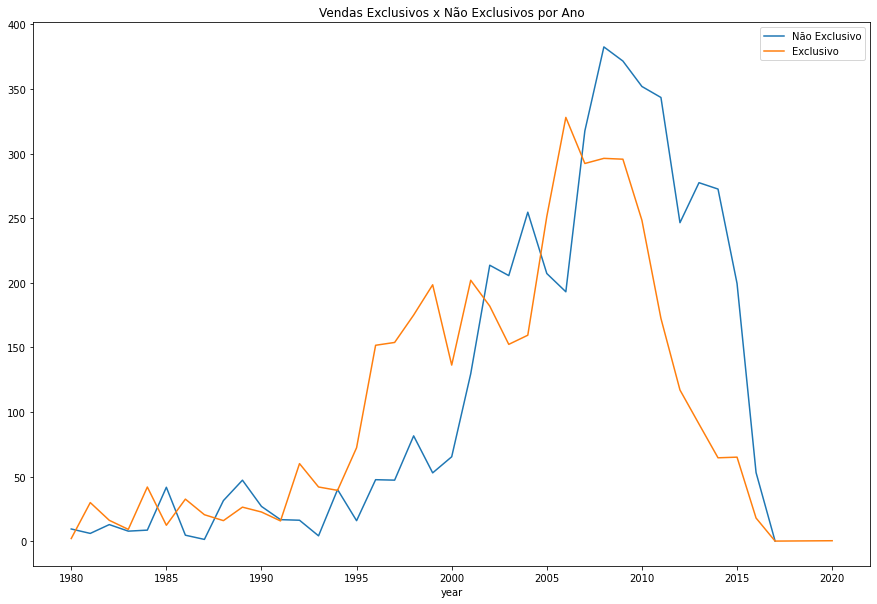

In [ ]:
df_exclusive.groupby(['year','is_exclusive']).sum()[['global_sales']].reset_index().pivot('year','is_exclusive','global_sales').plot(figsize=(15,10))
plt.title('Vendas Exclusivos x Não Exclusivos por Ano')
plt.legend(['Não Exclusivo','Exclusivo'])
plt.show()